/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


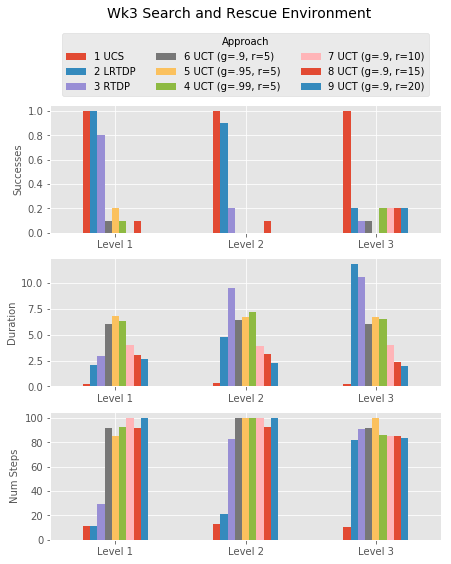

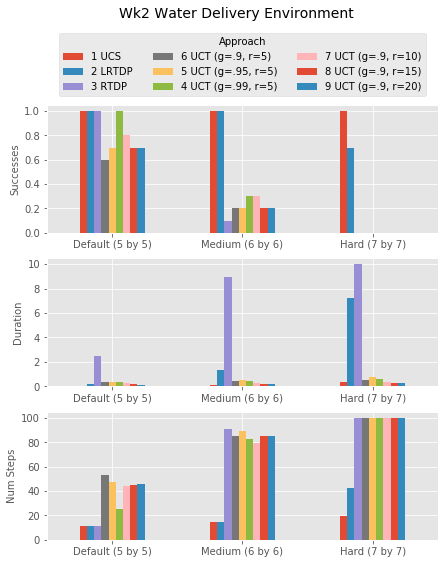

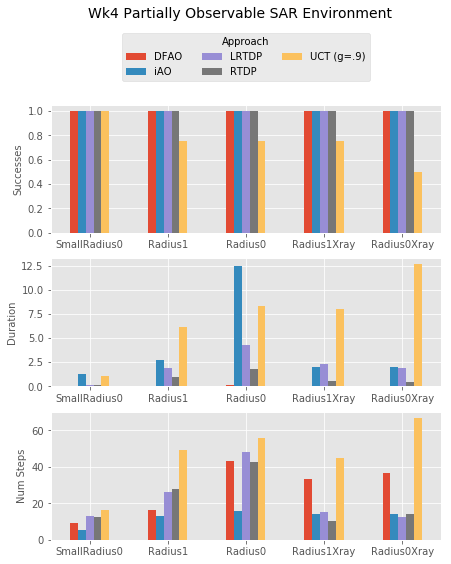

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
plt.style.use('ggplot')

envs = {
    'sar': ['Wk3 Search and Rescue', range(1,4)],
    'water': ['Wk2 Water Delivery', ['default', 'medium', 'hard']],
    'posar': ['Wk4 Partially Observable SAR', 
              ["SmallPOSARRadius0",
                "POSARRadius1",
                "POSARRadius0",
                "POSARRadius1Xray",
                "POSARRadius0Xray",]]
}

means_prefix = 'means_'
std_prefix = 'std_'

items = ['Successes', 'Duration', 'Num Steps']
renames_index = {'astar_uniform':'1 UCS', 
                'uct1': '6 UCT (g=.9, r=5)', 
                'uct2': '5 UCT (g=.95, r=5)', 
                'uct3': '4 UCT (g=.99, r=5)', 
                'uct4': '7 UCT (g=.9, r=10)', 
                'uct5': '8 UCT (g=.9, r=15)', 
                'uct6': '9 UCT (g=.9, r=20)',
                'rtdp': '3 RTDP',
                'lrtdp': '2 LRTDP',
                 
                'pouct': 'UCT (g=.9)',
                'po-lrtdp': 'LRTDP',
                'po-rtdp': 'RTDP',
                'idaos': 'iAO',
                'dfaos': 'DFAO'}

def get_all_levels(prefix, env):
    for idx in range(len(levels)):
        level = levels[idx]
        temp = pd.read_csv(f'{prefix}{level}.csv')
        temp.set_index('Approach', inplace=True)
        temp = temp[[item]]
        
        if env == 'sar':
            temp = temp.rename({item: f'Level {level}'}, axis='columns')
        elif env == 'water':
            size = idx+5
            temp = temp.rename({item: f'{level.capitalize()} ({size} by {size})'}, axis='columns')
        else:
            temp = temp.rename({item: level.replace('POSAR','')}, axis='columns')
        
        temp = temp.rename(renames_index, axis='index')
        if idx == 0:
            means = temp
        else:
            means = means.join(temp)
    return means.T

for env in envs.keys():
    title, levels = envs[env]
    fig, ax = plt.subplots(3, figsize=(7, 8))

    for index in range(len(items)):
        item = items[index]
        means = get_all_levels(means_prefix, env)
        ax[index].set_ylabel(item, fontsize='medium')
    #     std = get_all_levels(std_prefix)
        means.plot.bar(ax=ax[index]) ## yerr=std, 
    #     ax[index].legend(title='Approach', bbox_to_anchor=(1, 1.05), loc='upper left')
        ax[index].get_legend().remove()
        ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=0)

    ax[0].legend(title='Approach', bbox_to_anchor=(0.5, 1.6), ncol=3, loc='upper center')
    fig.suptitle(f'{title} Environment', y=1.05, fontsize=14)
    fig.show()
    plt.savefig(join('report', f'{title}.pdf'), bbox_inches='tight', pad_inches=1)  
    